## Preparation

In [1]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.api.types import CategoricalDtype
from plotnine import ggplot, aes, geom_col, labs

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.


## STEP 1 - Collect data

In [2]:
#collect a dataset
m1_2022 = pd.read_csv(r'/kaggle/input/bikeshareanalysis2022/202201-divvy-tripdata.csv')
m2_2022 = pd.read_csv(r'/kaggle/input/bikeshareanalysis2022/202202-divvy-tripdata.csv')
m3_2022 = pd.read_csv(r'/kaggle/input/bikeshareanalysis2022/202203-divvy-tripdata.csv')
m4_2022 = pd.read_csv(r'/kaggle/input/bikeshareanalysis2022/202204-divvy-tripdata.csv')
m5_2022 = pd.read_csv(r'/kaggle/input/bikeshareanalysis2022/202205-divvy-tripdata.csv', sep = ";")
m6_2022 = pd.read_csv(r'/kaggle/input/bikeshareanalysis2022/202206-divvy-tripdata.csv')
m7_2022 = pd.read_csv(r'/kaggle/input/bikeshareanalysis2022/202207-divvy-tripdata.csv')
m8_2022 = pd.read_csv(r'/kaggle/input/bikeshareanalysis2022/202208-divvy-tripdata.csv')
m9_2022 = pd.read_csv(r'/kaggle/input/bikeshareanalysis2022/202209-divvy-tripdata.csv')
m10_2022 = pd.read_csv(r'/kaggle/input/bikeshareanalysis2022/202210-divvy-tripdata.csv')
m11_2022 = pd.read_csv(r'/kaggle/input/bikeshareanalysis2022/202211-divvy-tripdata.csv', sep = ";")
m12_2022 = pd.read_csv(r'/kaggle/input/bikeshareanalysis2022/202212-divvy-tripdata.csv')

## STEP 2 - Combine Data into a Single Data Frame

In [3]:
#check columns names
list(m1_2022.columns)
list(m2_2022.columns)
list(m3_2022.columns)
list(m4_2022.columns)
list(m5_2022.columns)
list(m6_2022.columns)
list(m7_2022.columns)
list(m8_2022.columns)
list(m9_2022.columns)
list(m10_2022.columns)
list(m11_2022.columns)
list(m12_2022.columns)

['ride_id',
 'rideable_type',
 'started_at',
 'ended_at',
 'start_station_name',
 'start_station_id',
 'end_station_name',
 'end_station_id',
 'start_lat',
 'start_lng',
 'end_lat',
 'end_lng',
 'member_casual']

In [4]:
#check data types
m1_2022.dtypes
m2_2022.dtypes
m3_2022.dtypes
m4_2022.dtypes
m5_2022.dtypes
m6_2022.dtypes
m7_2022.dtypes
m8_2022.dtypes
m9_2022.dtypes
m10_2022.dtypes
m11_2022.dtypes
m12_2022.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [5]:
#combine/bind all sheet/rows
all_trips = pd.concat([m1_2022,m2_2022,m3_2022,m4_2022,m5_2022,m6_2022,m7_2022,m8_2022,m9_2022,m10_2022,m11_2022,m12_2022])

## STEP 3 - Clean Up and Add Data

In [6]:
#check top 4 rows in every column
all_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [7]:
#check bottom 4 rows in every column
all_trips.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
181805,2DD1587210BA45AE,classic_bike,2022-12-09 00:27:25,2022-12-09 00:35:28,Southport Ave & Waveland Ave,13235,Seeley Ave & Roscoe St,13144,41.948150,-87.663940,41.943403,-87.679618,casual


In [8]:
#Remove some unused column
columns = ['start_lat', 'start_lng', 'end_lat', 'end_lng']
all_trips_v2 = all_trips.drop(columns, axis = 1) #axis = 1 for columns, 0 for rows

In [9]:
#total rows and column in a data frame
all_trips_v2.shape

(5658394, 9)

In [10]:
#total value point = columns*rows
all_trips_v2.size

50925546

In [11]:
#check columns name
all_trips_v2.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'member_casual'],
      dtype='object')

In [12]:
#check column data type
all_trips_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5658394 entries, 0 to 181805
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   ride_id             object
 1   rideable_type       object
 2   started_at          object
 3   ended_at            object
 4   start_station_name  object
 5   start_station_id    object
 6   end_station_name    object
 7   end_station_id      object
 8   member_casual       object
dtypes: object(9)
memory usage: 431.7+ MB


In [13]:
#check statistical summary
all_trips_v2.describe()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
count,5658394,5658394,5658394,5658394,4833773,4833773,4774794,4774794,5658394
unique,5658394,3,4001777,4012550,1674,1339,1692,1343,2
top,C2F7DD78E82EC875,electric_bike,11/05/2022 17:13,30/05/2022 17:24,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,member
freq,1,2879771,75,89,75235,75235,75382,75382,3336362


In [14]:
#check unique value in membership column
all_trips_v2["member_casual"].value_counts()

member    3336362
casual    2322032
Name: member_casual, dtype: int64

In [15]:
#check total null value each column
all_trips_v2.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    824621
start_station_id      824621
end_station_name      883600
end_station_id        883600
member_casual              0
dtype: int64

In [16]:
#check duplicated value
all_trips_v2.duplicated().value_counts()

False    5658394
dtype: int64

In [17]:
#if there's any duality on member_casual value, change using this
all_trips_v2['member_casual'] = all_trips_v2['member_casual'].replace({'Subscriber': 'member', 'Customer': 'casual'})

In [18]:
#split time based on month, day, year

all_trips_v2['date'] = pd.to_datetime(all_trips_v2['started_at']).dt.date
all_trips_v2['month'] = pd.to_datetime(all_trips_v2['date']).dt.month
all_trips_v2['day'] = pd.to_datetime(all_trips_v2['date']).dt.day
all_trips_v2['year'] = pd.to_datetime(all_trips_v2['date']).dt.year
all_trips_v2['day_of_week'] = pd.to_datetime(all_trips_v2['date']).dt.day_name()

In [19]:
#calculate ride length by using ended and started time in date time format
all_trips_v2['ride_length'] = pd.to_datetime(all_trips_v2['ended_at']) - pd.to_datetime(all_trips_v2['started_at'])

In [20]:
#check if ride_length column in numeric types. if falses = non-numeric
all_trips_v2['ride_length'].dtype.kind in 'ifc'

False

In [21]:
#convert ride_length to numeric
all_trips_v2['ride_length'] = all_trips_v2['ride_length'].dt.total_seconds()

In [22]:
#there's minus value in ride_length = unlogic. Delete it
all_trips_v3 = all_trips_v2[all_trips_v2['ride_length'] > 0]

In [23]:
#check column name again
all_trips_v3.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'member_casual', 'date', 'month', 'day', 'year',
       'day_of_week', 'ride_length'],
      dtype='object')

In [24]:
#change member_casual column name to membership_type
all_trips_v3 = all_trips_v3.rename(columns={'member_casual': 'membership_type'})

## STEP 4 - Descriptive Analysis

In [25]:
#check summarize of ride_length column
all_trips_v3['ride_length'].mean()

1928.922657810063

In [26]:
#median
all_trips_v3['ride_length'].median()

617.0

In [27]:
#min
all_trips_v3['ride_length'].min()

1.0

In [28]:
#max
all_trips_v3['ride_length'].max()

21118620.0

In [29]:
#compare members and casual riders based on average ride length & number of rides
member_compare = all_trips_v3.dropna(subset=['membership_type']) \
                             .groupby('membership_type') \
                             .agg(average_ride_length=('ride_length', 'mean'), \
                                  number_of_rides=('ride_length', 'count'))

In [30]:
#check member_compare results
print(member_compare)

                 average_ride_length  number_of_rides
membership_type                                      
casual                   2977.854037          2316949
member                   1198.846085          3328857


In [31]:
#reorder the day. Sunday = 1, monday = 2
all_trips_v3['day_of_week'] = all_trips_v3['day_of_week'].astype(CategoricalDtype(categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], ordered=True))

In [32]:
#check if the day levels is correct
all_trips_v3['day_of_week'].min()
all_trips_v3['day_of_week'].max()

'Saturday'

In [33]:
# check the average member per day
avg_member_per_day = all_trips_v3.dropna(subset=['membership_type']).groupby(['membership_type', 'day_of_week']).agg({'ride_length': ['count', 'mean']})
avg_member_per_day.columns = ['number_of_rides', 'average_ride_length']
avg_member_per_day = avg_member_per_day.reset_index().sort_values(by=['day_of_week'])

In [34]:
#view the results of avg memb per day
print(avg_member_per_day)

   membership_type day_of_week  number_of_rides  average_ride_length
0           casual      Sunday           379004          2564.045007
7           member      Sunday           384045          1181.432309
1           casual      Monday           289454          3539.391503
8           member      Monday           486824          1220.708353
2           casual     Tuesday           269139          3499.548193
9           member     Tuesday           520587          1298.593981
3           casual   Wednesday           268344          3663.139399
10          member   Wednesday           498514          1152.452206
4           casual    Thursday           288277          1811.677727
11          member    Thursday           497767           897.768924
5           casual      Friday           346454          2837.248244
12          member      Friday           485699          1311.285065
6           casual    Saturday           476277          3093.103780
13          member    Saturday    

## STEP 5 - Design a Visualization

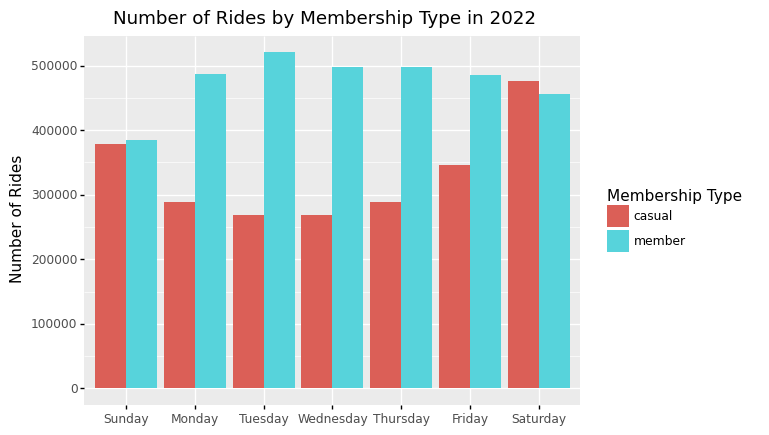

<ggplot: (8741522660413)>

In [35]:
# num of ride by day
ggplot(data=avg_member_per_day, mapping=aes(x='day_of_week', y='number_of_rides', fill='membership_type')) + \
geom_col(position='dodge') + \
labs(title='Number of Rides by Membership Type in 2022', 
     x='', y='Number of Rides', 
     fill='Membership Type')

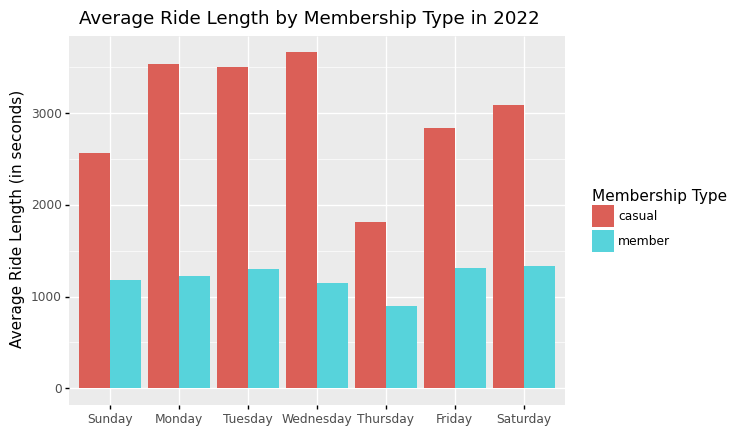

<ggplot: (8741671065505)>

In [36]:
# average ride length by day
ggplot(data=avg_member_per_day, mapping=aes(x='day_of_week', y='average_ride_length', fill='membership_type')) + \
    geom_col(position='dodge') + \
    labs(title='Average Ride Length by Membership Type in 2022',
         x='',
         y='Average Ride Length (in seconds)',
         fill='Membership Type')

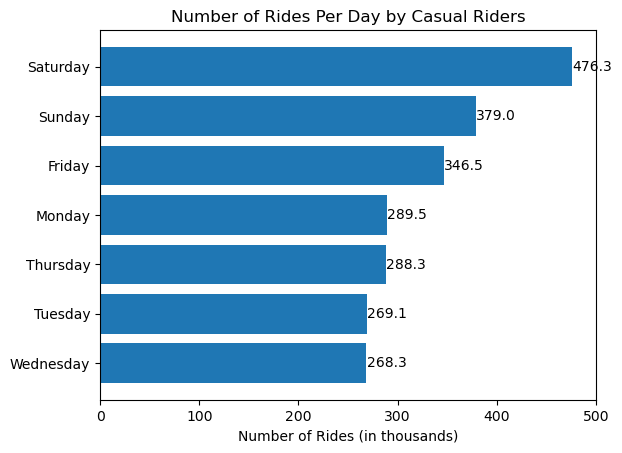

In [37]:
highest_day_nor = avg_member_per_day.query('membership_type == "casual"').sort_values('number_of_rides', ascending=False)

plt.barh(highest_day_nor['day_of_week'], highest_day_nor['number_of_rides']/1000)
plt.title("Number of Rides Per Day by Casual Riders")
plt.xlabel("Number of Rides (in thousands)")
plt.gca().invert_yaxis()

for i, v in enumerate(highest_day_nor['number_of_rides']/1000):
    plt.text(v + 0.3, i, str(round(v, 1)), color='black', ha='left', va='center')


plt.show()